In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pathlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import datetime

In [2]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [3]:
BATCH_SIZE = 3
train_dataset = train.flow_from_directory('dataset 2/train', target_size=(299,299), batch_size=BATCH_SIZE, class_mode='categorical')
val_dataset = test.flow_from_directory('dataset 2/validation', target_size=(299,299), batch_size=BATCH_SIZE, class_mode='categorical')
test_dataset = test.flow_from_directory('dataset 2/test', target_size=(299,299), batch_size=BATCH_SIZE, class_mode='categorical')

Found 60 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
# Load InceptionV3 model without the top layers
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the base model layers
base_model.trainable = False

In [5]:
# Add new classification layers on top of the base model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 23903010 (91.18 MB)
Trainable params: 2100226 (8.01 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

In [6]:
EPOCH = 20
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=val_dataset) 

Epoch 1/20
20/20 [==============================] - 17s 568ms/step - loss: 2.3029 - accuracy: 0.5000 - val_loss: 2.7303 - val_accuracy: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 10s 507ms/step - loss: 1.4874 - accuracy: 0.6333 - val_loss: 1.0084 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 12s 598ms/step - loss: 0.9600 - accuracy: 0.6667 - val_loss: 2.6246 - val_accuracy: 0.1000
Epoch 4/20
20/20 [==============================] - 10s 522ms/step - loss: 0.8575 - accuracy: 0.6667 - val_loss: 3.0987 - val_accuracy: 0.0000e+00
Epoch 5/20
20/20 [==============================] - 10s 518ms/step - loss: 0.9075 - accuracy: 0.6500 - val_loss: 0.8141 - val_accuracy: 0.8000
Epoch 6/20
20/20 [==============================] - 10s 518ms/step - loss: 0.4258 - accuracy: 0.8000 - val_loss: 1.9451 - val_accuracy: 0.2000
Epoch 7/20
20/20 [==============================] - 10s 517ms/step - loss: 0.4183 - accuracy: 0.8333 - val_loss: 0.8682 - val_accuracy

In [15]:
test_loss , test_accuracy = model.evaluate(test_dataset)
print(f'Model Accuracy: {test_accuracy}')

7/7 [==============================] - 3s 455ms/step - loss: 1.9776 - accuracy: 0.4500
Model Accuracy: 0.44999998807907104


In [16]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions,2)
predictions

7/7 [==============================] - 3s 473ms/step


array([[0.  , 1.  ],
       [0.21, 0.79],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.12, 0.88],
       [0.14, 0.86],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.05, 0.95]], dtype=float32)

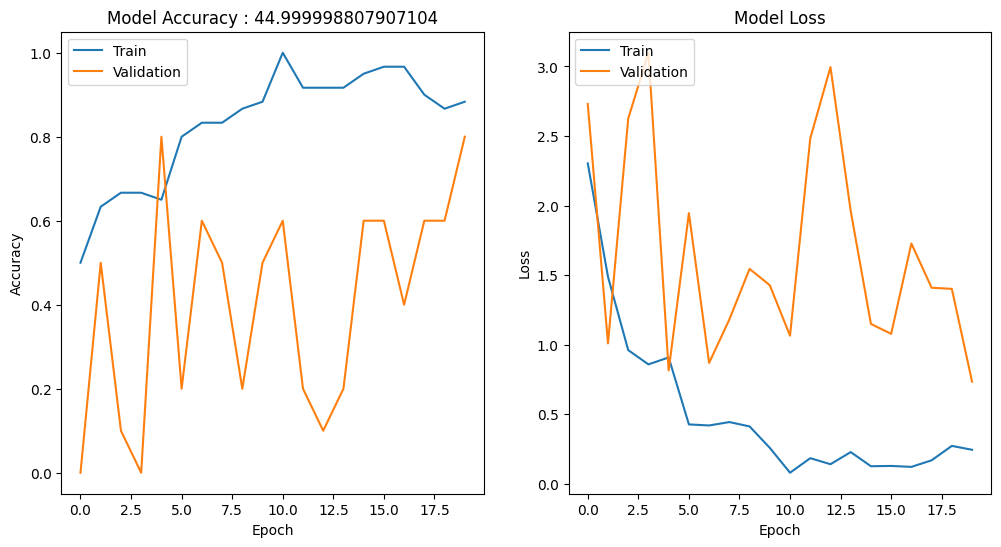

In [17]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title(f'Model Accuracy : {test_accuracy*100}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Get current date and time
now = datetime.datetime.now()

# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")

# Save the plot with the specified name format
# plt.savefig(f"{date_time_str}.png")
plt.show()

7/7 [==============================] - 4s 494ms/step


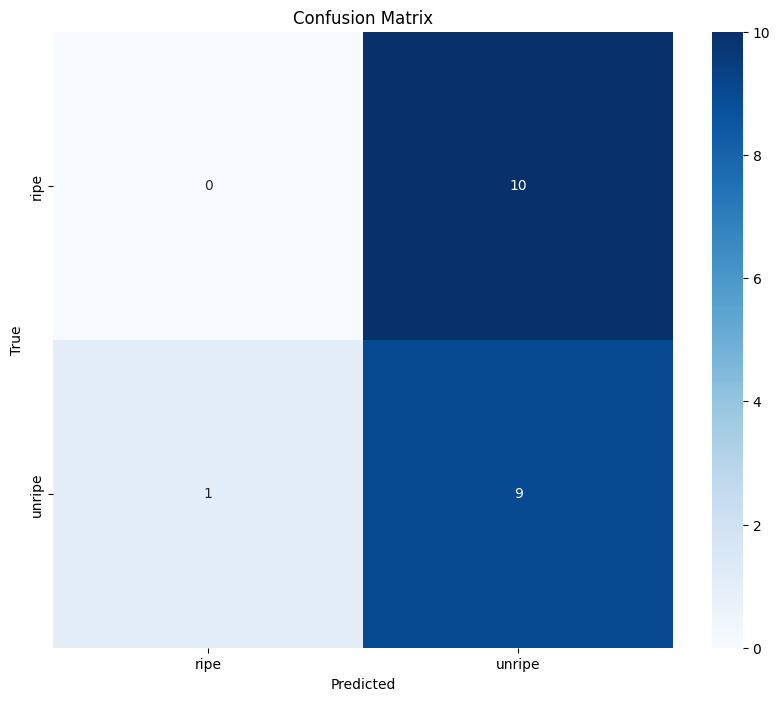

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [18]:
# Get true labels and predictions
true_labels = test_dataset.classes
class_names = list(test_dataset.class_indices.keys())

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(true_labels)
print(predicted_classes)

In [11]:
# # save model to .keras file
# now = datetime.datetime.now()
# # Format the date-time string as 'MMDDYYYY-HHMM'
# date_time_str = now.strftime("%d%m%Y-%H%M%S")

In [12]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TFLite model to a file
# with open(f'{date_time_str}.tflite', 'wb') as f:
#     f.write(tflite_model)

ROC and AUC to determine the most optimal threshold for Confussion Matrix \
Credit : https://www.youtube.com/watch?v=Joh3LOaG8Q0 (Dr. Sreenivas Bhattiprolu)

In [13]:
# # Make predictions
# y_preds = model.predict(X_test).ravel()

# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'y--')
# plt.plot(fpr, tpr, marker='.')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.show()

In [14]:
# i = np.arange(len(tpr)) 
# roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
# ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
# print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 